<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 7, 2024.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

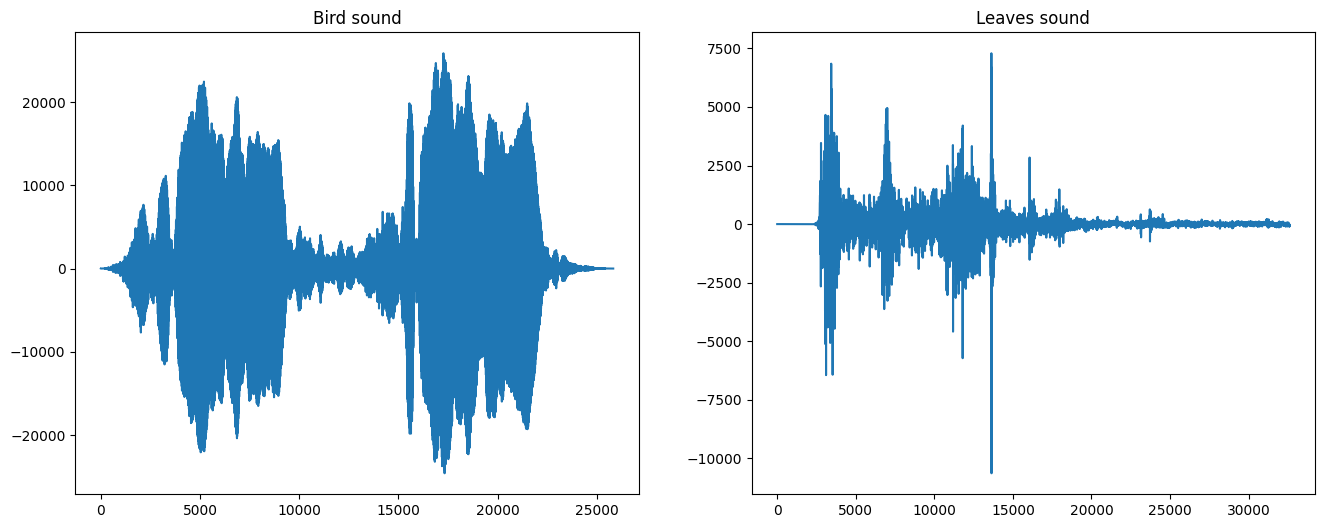

In [2]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import read
__author__ = "Flueckiger Manuel and Palapurackal Deepak"

fs_bird, sound_bird = read('./data/bird.wav')
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

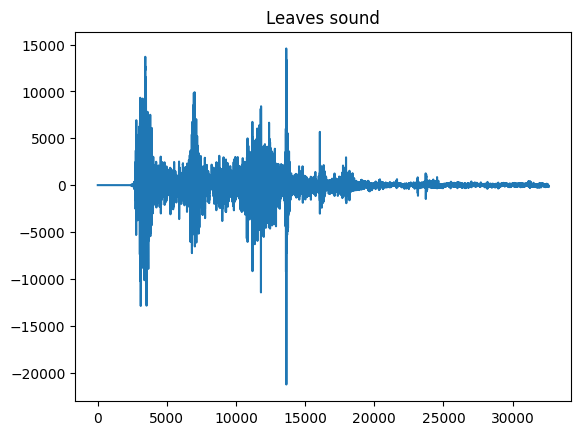

In [31]:
# doubled the amplitude of the audio signal
amplified_leaves = np.multiply(sound_leaves, 2)

# plot the amplified audio signal
plt.plot(amplified_leaves)
plt.title("Leaves sound")
plt.show()

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [32]:
print(f"{len(sound_bird) = }, {len(amplified_leaves) = }")

# new leave sound with the length of bird_length
cut_leaves = amplified_leaves[:len(sound_bird)]

print(f"{len(sound_bird) = }, {len(cut_leaves) = }")
print(f"{len(cut_leaves) == len(sound_bird) = }")

len(sound_bird) = 25824, len(amplified_leaves) = 32612
len(sound_bird) = 25824, len(cut_leaves) = 25824
len(cut_leaves) == len(sound_bird) = True


3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [33]:
silence = np.zeros(len(sound_bird))

4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

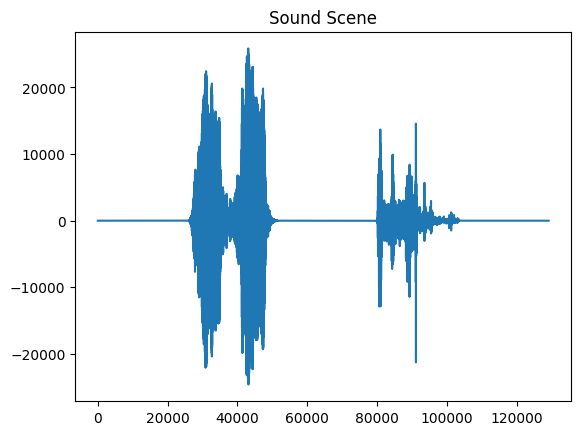

In [34]:
# create the sound scene
sound_scene = np.concatenate([silence, sound_bird, silence, cut_leaves, silence])

# plot the new comined_sound
plt.plot(sound_scene)
plt.title("Sound Scene")
plt.show()

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

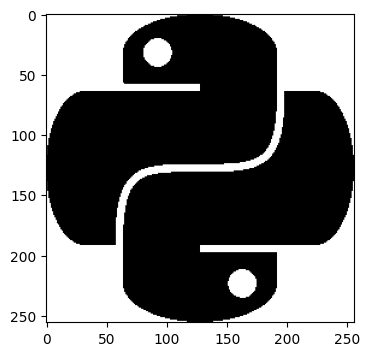

In [35]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/python.bmp')
im = np.array(im, dtype=np.uint8)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels on the 50th to 60th row and and 200th to 210th column to green, and displays the resultant image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**NB!** 
- From the 50th row, up to and including the 60th; From the 200th column, up to and including the 210th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

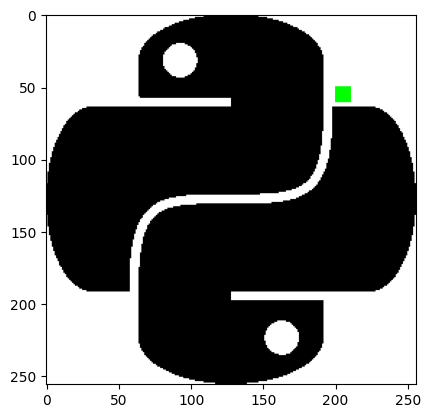

In [51]:
# I don't want to always have to run the upper block to import the array, so I make a copy to work on.
# This will be reflected in the exercise 4 where we need to compare to the "original" array
copied_arr = np.array(im, copy=True)
# color pixels (firs index including, second excluding) green
copied_arr[50:61, 200:211] = [0, 255, 0]
plt.imshow(copied_arr)
plt.show()

2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method, and plot the result. (*1 point*)

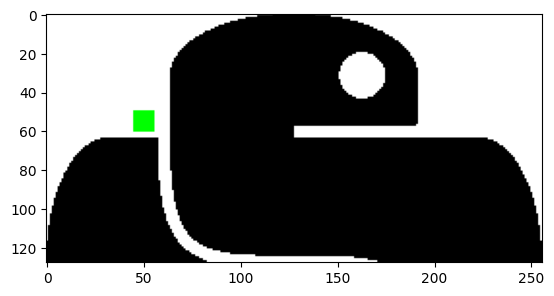

In [52]:
# divi up the array into two subarrays using intcasting to get the middle as whole number.
copy_top, copy_bottom = np.vsplit(copied_arr, [int(len(copied_arr)/2)])

# flip the top half along the second axis (index 1)
flipped_top = np.flip(copy_top,1)
plt.imshow(flipped_top)
plt.show()

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

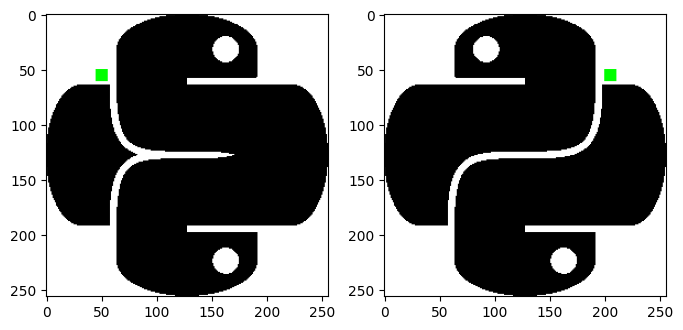

In [55]:
# we have the copy of the bottom half already from the previous exercise
# concatanating the flipped top half and bottom half to one picture
img = np.concatenate([flipped_top, copy_bottom])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(copied_arr)
plt.show()

4. Make a shallow copy (view) of the top half of your image. Change every black pixel ([0, 0, 0]) to a green pixel ([0, 255, 0]). Plot the resulting colored top part, together with the base of your shallow copy and also the original image. (*2 points*)

**Hint**: to test that a consition holds for multiple elements use the *numpy.all* function.

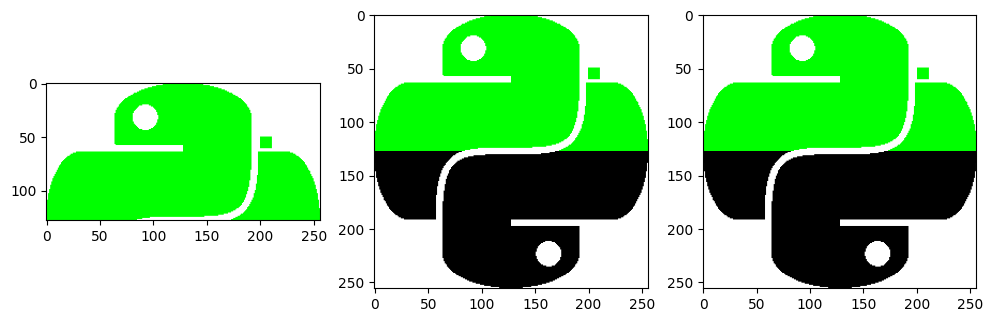

In [50]:
#Create a view of the top half of the image
view_top = copy_top.view()

# old way which uses C - functions, but when I thought about what I was doing I realized it's way to complicated
# # Increase the green channel values by 255
# view_top[:, :, 1] += 255
# # Ensures that the green channel values stay within the valid rage 
# # (for this we need the dtype from the array to be uint16 though and since I found a fix I changed the dtype back to uint8)
# view_top[:, :, 1] %= 256

view_top[:, :, 1] = 255
# Only works if you want 100% green, no mixture (like lightgreen or something)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(view_top)
plt.subplot(1, 3, 2)
plt.imshow(view_top.base)
plt.subplot(1, 3, 3)
plt.imshow(copied_arr)
plt.show()
        
        

5. In point 3, your original image should not have changed, while in point 4, the original image should show the same change as when plotting the base of your shallow copy. Give a brief explanation of why the original image changed in one instance, and not in the other. (*2 points*)

In [40]:
"""
in point 3 we copied the whole array to a different space in memory where we edited it. So the original image stays the same.
In point 4 we created a shallow copy which uses the same data buffer as the original array but lets us focus on certain parts 
 of the array (img in that case). Changes in that data buffer will affect the original.   
"""
"""
IN OTHER WORDS:
In point 3 we used a copy of the array. This copy is a new array that owns its data. to store the data you will need additional space.
Changes made to the copy do not affect the original array and vice versa.
In point 4 we used a view instead of a copy. A view does not have its own data. It does not need additional space to store the data. 
It views the data contained in the original array. Modification to the view impact the original array.
"""

'\nin point 3 we copied the whole array to a different space in memory where we edited it. So the original image stays the same.\nIn point 4 we created a shallow copy which uses the same data buffer as the original array but lets us focus on certain parts of the array (img in that case). Changes in that data buffer will affect the original.   \n'

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset and assign the variables:

In [41]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)

switzerland = precip[:, 0]  # 12 data points for Switzerland (one per month)
italy = precip[:, 1]  # 12 data points for Italy (one per month)
france = precip[:, 2]  # 12 data points for France (one per month)
germany = precip[:, 3]  # 12 data points for Germany (one per month)
print(switzerland, italy, france, germany, sep="\n")

[0.7  0.75 1.85 2.93 3.05 2.02 1.93 1.62 1.84 1.31 1.39 0.84]
[0.4  0.48 1.57 2.56 2.47 1.59 1.58 1.36 1.53 1.   1.12 0.54]
[0.51 0.52 1.63 2.69 2.89 1.75 1.75 1.41 1.65 1.11 1.21 0.66]
[1.19 1.23 2.37 3.37 3.55 2.5  2.36 2.17 2.38 1.78 1.79 1.24]


1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the five countries for each month. (*1 point*)

In [42]:
# use np.max() along the axis=0 to get the maximum precipitation for each country
# use np.mean() along the axis=1 to calculate the average precipitation across the five countries for each month
print(f"max per country: {precip.max(axis = 0)}\nmean per month over countries: {precip.mean(axis = 1)}")

max per country: [3.05 2.56 2.89 3.55]
mean per month over countries: [0.7    0.745  1.855  2.8875 2.99   1.965  1.905  1.64   1.85   1.3
 1.3775 0.82  ]


2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [43]:
# find the maximum precipitation of the entire datset
max = precip.max()
# since it is implied that there is only one maximum, we can use [0] to directly get a 1D-Array of the location
location = np.argwhere(precip == max)[0]
print(f"{max = }, location: {location} access: {precip[location[0]][location[1]] = }")

max = 3.55, location: [4 3] access: precip[location[0]][location[1]] = 3.55
